__Автор__: Карпаев Алексей, ассистент кафедры информатики и вычислительной математики.

# Метод конечных разностей для численного решения ОДУ: программная реализация, ОО подход

# (TODO: разобраться с путаницей в выводе решений функций из "прмежуточной части")

## Математическая постановка задачи

В данной лекции будем рассматривать __задачу Коши для автономного ОДУ__:

$$ \frac{d u}{d t} = f\left(u \right), $$
$$ u \left( 0 \right) = u_0 $$
$$ t \in D = (0, T) $$ // TODO: check interals

В качестве конкретного примера возьмем __логистическое уравнение__, имеющее правую часть следующего вида:
$$
f \left( u; \alpha, R \right) = \alpha \cdot u \cdot \left( 1 - \frac{u}{R} \right)
$$

Уравнение описывает динамику популяции с учетом влияния факторов окружающей среды, ограничивающих экспоненциальный рост населения со временем.

## Процесс численного решения уравнения
Производим дискретизацию расчетной области: вводим равномерную сетку с шагом $\Delta t = \frac{T}{N}$ c числом отрезков разбиения $N$. Для нахождения численного решения будем рассматривать следующий набор численных методов:
* Явный метод Эйлера
* Метод Эйлера с пересчетом (__TODO: check "модфифицированный метод Эйлера"__)
* Один из явных методов Рунге-Кутты 3-го порядка аппроксимации
* Метод RK-4
* Неявный метод Эйлера
* Неявный метод трапеций

Все методы являются __одношаговыми__ и относятся к семейству __методов Рунге-Кутты__.

### Алгоритм нахождения численного решения (напоминание из курса "Вычислительная математика")
    
1. Инициализация параметров задачи
2. Инициализация начального условия
2. while t_current < T do: //cursive; также разобраться с выбором языка
       perform_step()
   //Значения численного решения в узлах сетки находятся последовательно, одно за другим.
3. Визуализация численного решения (опционально).

Каждый пункт алгоритма вам уже знаком; тем не менее, остановимся подробней на функции perform_step() из пунтка №3.
### Функция  perform_step()

__Передваритеьный вопрос__: в чем формальное отличие явных методов от неявных? 

__Ответ__: при использовании __явного__ метода для нахождения $u^{n+1}$ требуется решать __линейное уравнение__, решение которого тривиально получается аналитически --- полученная явная формула транслируется в строку кода.
    При использовании __неявного__ метода пояляется __нелинейное__ уравнение, решение которого уже ищут приближенно при помощи какого-либо итерационного метода. Мы будем использовать __метод Ньютона__, алгоритм которого закодмируем в программе.
    
__Для единообразия__ программной реализации метод Ньютона будет также использоваться и в явном методе, для нахождения корня линейного уравнения.

In [ ]:
class NewtonSolver:
    def __init__(self, numIterations):
        self._numIterations = numIterations
        
    def SetFunction(self):
        # TODOTODOTODO #

## Программная реализация
### Процедурный подход

In [1]:
# necessary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=20) # for the font adjustments

In [11]:
# grid & model perameters
numBlocks = 10
tEnd = 40
dt = float(tEnd)/float(numBlocks)
initialValue = 0.1

type(numBlocks)

int

In [12]:
# right-hand side and additional plot function
def Rhs(u):
    return 0.2*u*(1 - u)

def PlotSolution(timeArray, solutionArray, title):
    plt.plot(timeArray, 100*solutionArray, '-', linewidth=4, markersize = 10) ## 100 --- for %
    plt.grid('on')
    plt.title(title)
    plt.xlabel('Время, с')
    plt.ylabel('Население,%')
    plt.show()

checkin
checkin


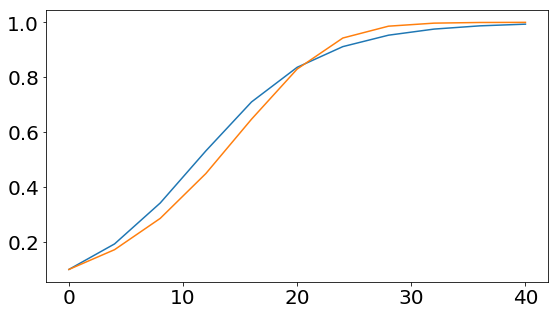

In [13]:
-

Итак, мы получили некий результат...

// В вышеприведенных функциях численного решения ОДУ присутствует сравнительно небольшое количество строк, и их написание занимает пару минут - подходит для быстрого получения результатов. Однако, если нам требуется провести детальный анализ численного решения с учетом применения различных методов численного решения ОДУ или программа создается для многократного использования в т.ч. и сторонними пользователями/разработчиками, то использование объектно-ориентированного стиля является более предпочтительным. // перечитать и убрать весь абзац, скорее всего.

// Из вышеприведенных реализаций видно, что в коде присутствуют дословно повторяющиеся участки, т.о. перед нами опять возникла задача сокращения размера программы, которую поможет решить применение классов и механизмов наследования. // -> Посмотрим, как можно продемонстрировать ОО подход к данной задачей.

Попробуем создать класс, в который в который поместим функционал, требующийся для реализации вычислений по модифицированному методу Эйлера (class ModifiedEuler). Какой набор полей и методов может потребоватья для этого? (назовите):

__Поля класса__:
* функция правой части ОДУ
* начальное условие
* массив точек сетки и ее параметры: кол-во точек, промежутков, шаг сетки
* массив значений численного решения 
* начальный и конечный моменты времени
* номер текущего шага по времени 
* (что-либо еще)

__Методы класса__:
* Конструктор
* Задать начальные условия
* Задать функцию правой части
* Решить: "timestepping" - цикл по точкам сетки; на каждом шаге цикла вызывается функция SolveEquation()
* Построить график численного решения
* Построить график аналитического решения
* Сравнить численное и аналитичическое решения по определенной норме

In [ ]:
# оформление функции правой части в виде функтора
class LogisticRightHandSide:   
    def __call__(self, u):
        return 0.2*u*(1 - u)

In [2]:
# we group up in this class everything connected with the math. formulaion
class Problem:
    def __init__(self):
        self._initialCondition = 0.1
        self._alpha = 2.0
        self._R = 1.0
    def Rhs(self, u):
        return self._alpha*u*(1 - u/float(self._R))

In [ ]:
# we group up in this class everything connected with the mesh and the corresponding solution
class Mesh(self, numBlocks, tStart, tEnd):
        def __init__(self);  
            self._numBlocks, self._numPoints = numBlocks, numBlocks + 1
            self._dt = float(tEnd)/float(self._numBlocks)
            self._solutionArray = np.zeros(self._numPoints)
            self._timeArray = np.linspace(tStart, tEnd, self._numPoints)
            self._tStart, self._tEnd = tStart, tEnd
        
            # вспомогательная переменная, используется для вывода прогресса решения на экран
            self._isLessThanloo = True
            if self._numBlocks > 100:
                xck ,self._isLessThanloo = False

In [ ]:
import time
# (Problem-grid-solver-divine was taken from I.Tsybulin lectures
class ModifiedEulerSolver_version1:
    def __init__(self, problem, mesh):
        self._problem = problem
        self._mesh = mesh
        print ('A %s solver initialized.' % self.__class__.__name__)

    def GetStepNumber(self):
        return self._counter
        
    
    def Solve(self):
        """Timestepping:
        Calculates numerical solution from 0 <= t <= T.""" 
        start = time.clock()
        self._counter = 0
        
        print ('Start of timestepping via %s method...' % self.__class__.__name__)
        self._solutionArray[0] = self._problem._initialValue
        for i in range(self._numBlocks):
            
            # для краткости
            uOld, dt, f, t = self._mesh._solutionArray[self._counter], self._dt, \
                             self._rightHandSideFunction, self._timeArray
                                
            # шаг модифицированного метода Эйлера
            uStar = uOld + dt*f(uOld)
            uNew = uOld + dt/2.*(f(uOld) + f(uStar))
            
            self._solutionArray[i + 1] = uNew
            self._counter += 1
            
            # каждые 100 шагов - вывод на экран
            if self._isLessThanloo or (self._counter % (self._numBlocks//100) == 0):
                print ('Step #%d completed.' % (self._counter))
            
        end = float(time.clock() - start)
        print ('Timestepping complete; calculations took %.2e s.' % end)
    
        return self._solutionArray, self._timeArray
    
    
    def PlotSolution(self):
        plt.figure()
        plt.plot(self._timeArray, self._solutionArray, '-', linewidth=4)
        plt.grid('on')
        plt.title('Solution via %s method' % self.__class__.__name__)
        plt.xlabel('t, s')
        plt.ylabel('Normalized population')
        plt.show()

Функцию рассчета численного решения на неявном слое по времени желательно оформить как отдельный метод класса __AdvanceNextStep()__:

In [ ]:
class ModifiedEuler_version2:
    def __init__(self):
        print ('A %s solver initialized.' % self.__class__.__name__)
        
    def SetRightHandSide(self, function):
        self._rightHandSideFunction = function
    
    def SetInitialCondition(self, value):
        self._initialValue = value
       
    def SetGrid(self, numBlocks, tStart, tEnd):
        self._numBlocks, self._numPoints = numBlocks, numBlocks + 1
        self._dt = float(tEnd)/float(self._numBlocks)
        self._solutionArray = np.zeros(self._numPoints)
        self._timeArray = np.linspace(tStart, tEnd, self._numPoints)
        self._tStart, self._tEnd = tStart, tEnd
        
        # вспомогательная переменная для вывода на экран
        self._isLessThanloo = True
        if self._numBlocks > 100:
            self._isLessThanloo = False
        
        
    def GetStepNumber(self):
        return self._counter
    
    
    def AdvanceNextStep(self):
        """Calculates solution value at a new timelayer via Modified Euler method formula."""    
        
        # для краткости
        uOld, dt, f, i, t = self._solutionArray[self._counter], self._dt, \
                                self._rightHandSideFunction, self.GetStepNumber(), self._timeArray
                                
        # шаг модифицированного метода Эйлера
        uStar = uOld + dt*f(uOld)
        uNew = uOld + dt/2. * (f(uOld) + f(uStar))
        
        return uNew
        
    
    def Solve(self):
        """Calculates numerical solution for 0 <= t <= T.""" 
        start = time.clock()
        self._counter = 0
        
        print ('Start of timestepping via %s method...' % self.__class__.__name__)
        self._solutionArray[0] = self._initialValue
        for i in range(self._numBlocks):
            self._solutionArray[i + 1] = self.AdvanceNextStep()
            self._counter += 1
            
            # каждые 100 шагов - вывод на экран для отслеживания прогресса
            if self._isLessThanloo or (self._counter % (self._numBlocks//100) == 0):
                print ('Step #%d completed.' % (self._counter))
            
        end = float(time.clock() - start)
        print ('Timestepping complete; calculations took %.2e s.' % end)
        
        return self._solutionArray, self._timeArray
    
    
    def PlotSolution(self):
        plt.figure()
        plt.plot(self._timeArray, self._solutionArray, '-', linewidth=4)
        plt.grid('on')
        plt.title('Solution via %s method' % self.__class__.__name__)
        plt.xlabel('t, s')
        plt.ylabel('Normalized population')
        plt.show()

Теперь протестируем последнюю версию класса-солвера на логистическом уравнении. Говорящие имена методов класса позволяют стороннему пользователю/разработчику разобраться в коде модуля, в котором обычно запускают расчеты:

In [ ]:
listOfRightHandSides = [LogisticRightHandSide()]

listOfMethods = [ModifiedEuler_version1, ModifiedEuler_version2] #  ExplicitEuler, ImplicitEuler, RungeKutta4, ...

for rightHandSide in listOfRightHandSides:
    for method in listOfMethods:
        solver = method() # создание объекта solver класса ModifiedEuler_version1
        solver.SetRightHandSide(rightHandSide)
        solver.SetInitialCondition(0.1)
        solver.SetGrid(numBlocks=200, tStart=0., tEnd=40.)
        solver.Solve()
        solver.PlotSolution()

В функции правой части также присутствуют параметры $\alpha$ и $R$. Для вычисления производной функции правой части по переменной $u$ параметры придется задать в качестве полей соответсвующего класса:

In [ ]:
class LogisticRightHandSideFull:
    def __init__(self, alpha, R):
        self._alpha, self._R = float(alpha), float(R)
    
    def __call__(self, u):
        return self._alpha*u*(1 - u/self._R)

В случае неавтономного ОДУ с правой частью $f(u, t)$ для вычисления $\frac{\partial f}{\partial u}$ c помощью функтора __Derivative__ из Задачи 2 переменную $t$ также придется передавать в класс в качестве параметра.

## Построение иерархии классов, реализующих различные методы численного интегрирования ОДУ

В задании потребуется написать классы для одношаговых методов ч.и. ОДУ: несколько явных и 1 неявный (метод трапеций 2-го порядка точности). В родительский класс __AbstractOneStepODESolver__ поместить поля и методы класса __ModifiedEuler_version2__, свойственные всем одношаговым методам ч.и. ОДУ. Классы, реализующие остальные одношаговые методы, получить при помощи наследования.

__Критерий корректности реализации иерархии классов__: отсутствие или минимум повторяющихся строк кода.

### Реализация неявного метода трапеций
Формула для проведения вычислений:

$$ u_{n+1} = u_n + \frac{\Delta t}{2} \left( f(u_n, t_n) + f(u_{n+1}, t_{n+1}) \right), \quad n =0,...,N-1 $$ 

Для решения получившегося нелинейного уравнения относительно $u_{n+1}$ будем использовать итерационный метод Ньютона:

$$ F(u_{n+1}) \equiv  u_{n+1} - \frac{\Delta t}{2} f(u_{n+1}, t_{n+1}) - u_n - \frac{\Delta t}{2} f(u_n, t_n) = 0$$

$$ u_{n+1}^{(k+1)} = u_{n+1}^{(k)} - \frac{F( u_{n+1}^{(k)} )}{ F'(u_{n+1}^{(k)}) }, \quad u_{n+1}^{(0)} = u_n + \Delta t  f(u_n, t_n)$$

$$
k = 0,...,K \quad   \Vert u_{n+1}^{(K)} - u_{n+1}^{(K-1)} \Vert \leq \varepsilon
$$

Для ускорения сходимости начальное приближение будем рассчитывать по формуле явного метода Эйлера, а для приближенного вычисления производной будем использовать формулу центральной разности 2-го порядка точности:

$$
    F'(u_{n+1}^{(k)}) \approx \frac{F(u_{n+1}^{(k)} + h) - F(u_{n+1}^{(k)} - h)}{2h}
$$

Решение нелинейного уравнения с помощью метода Ньютона можно оформить как внутри класса, так и в виде отдельной функции. При вычислении производной задействовать функторы, реализованные в Задаче 2.